In [1]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

In [2]:
gpt_out_path = 'gpt-2_output/'


In [3]:
vals_dict = {'tfs':[0.25, 0.75, 0.9, 0.95, 0.99],
'n': [0.5, 0.63, 0.69, 0.81, 0.75, 0.9], 'k':[1,40,200]  }

In [4]:
import random
keys =  list(vals_dict.keys())      # Python 3; use keys = d.keys() in Python 2
random.shuffle(keys)
lol = [(key, vals_dict[key]) for key in keys]
lol = dict(lol)

In [5]:
dict(lol)

{'tfs': [0.25, 0.75, 0.9, 0.95, 0.99],
 'k': [1, 40, 200],
 'n': [0.5, 0.63, 0.69, 0.81, 0.75, 0.9]}

In [6]:
times = []
for key,all_params in vals_dict.items():
    for par in all_params:
        for seed in [28,56,10,40,9]:
            
            time = pickle.load( gzip.open(gpt_out_path+'time_taken_for_all_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts_'+str(seed)+'-seed_345M_model-parallelized.pickle.gz', 'rb'))
            #'time_taken_for_all_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts_'+str(seed)+'-seed.pickle.gz', 'rb'))
            times.append((key, seed, par, time))

In [7]:
times = pd.DataFrame(times, columns=['sampling_method', 'seed', 'param', 'batch_times'])

In [8]:
times.head()

,sampling_method,seed,param,batch_times
0,tfs,28,0.25,"[14.40797472000122, 11.15978217124939, 11.2644..."
1,tfs,56,0.25,"[14.566617727279663, 11.099570989608765, 11.14..."
2,tfs,10,0.25,"[14.877935886383057, 11.185713768005371, 11.13..."
3,tfs,40,0.25,"[14.527210235595703, 11.186857223510742, 11.19..."
4,tfs,9,0.25,"[14.570848226547241, 11.2072594165802, 11.1792..."


In [9]:
times = pd.concat((times, pd.DataFrame(times.batch_times.tolist())), axis=1)

In [10]:
times.head()

,sampling_method,seed,param,batch_times,0,1,2,3
0,tfs,28,0.25,"[14.40797472000122, 11.15978217124939, 11.2644...",14.407975,11.159782,11.264415,11.166665
1,tfs,56,0.25,"[14.566617727279663, 11.099570989608765, 11.14...",14.566618,11.099571,11.148021,11.166413
2,tfs,10,0.25,"[14.877935886383057, 11.185713768005371, 11.13...",14.877936,11.185714,11.130695,11.224511
3,tfs,40,0.25,"[14.527210235595703, 11.186857223510742, 11.19...",14.527210,11.186857,11.192272,11.151201
4,tfs,9,0.25,"[14.570848226547241, 11.2072594165802, 11.1792...",14.570848,11.207259,11.179289,11.201687


In [12]:
g = times.groupby(['sampling_method', 'param'])[[1,2,3]].groups #sum() #.apply(lambda x: x.flatten())

flat_vals = dict()
for key, inds in g.items():
    v = times.iloc[inds]
    flat_vals[key] =v[[1,2,3]].values.flatten()

In [13]:
flat_vals

{('k',
  1.0): array([10.70450544, 10.81668258, 10.77051115, 10.77580953, 10.75902009,
        10.79396677, 10.74831176, 10.83450079, 10.77066088, 10.78446627,
        10.79776669, 10.73320484, 10.73523426, 11.04595184, 10.74969268]),
 ('k',
  40.0): array([11.00255704, 10.8620677 , 10.87388349, 10.8615098 , 10.84730482,
        10.83208275, 10.85567594, 10.86077523, 10.86623526, 10.89814568,
        10.844455  , 10.97310305, 10.89824986, 10.87689281, 10.94748402]),
 ('k',
  200.0): array([10.88920903, 10.86407351, 10.86321664, 10.91472173, 10.91362619,
        10.89119697, 10.89100766, 10.89188337, 10.88996172, 10.8305099 ,
        10.92275262, 10.99551058, 10.85646677, 10.91893554, 10.92009187]),
 ('n',
  0.5): array([11.94007134, 10.99834061, 13.40160728, 11.09677267, 11.06250691,
        11.07107759, 11.06527209, 11.31246495, 11.1000464 , 11.11699963,
        11.08606768, 11.15683842, 11.09955359, 11.07293344, 11.13024879]),
 ('n',
  0.63): array([11.07575107, 11.01980424, 11.02858

In [14]:
flat_vals = pd.DataFrame.from_dict(flat_vals).T

In [15]:
flat_vals.head()

0          1          2          3          4          5   \
k 1.00    10.704505  10.816683  10.770511  10.775810  10.759020  10.793967   
  40.00   11.002557  10.862068  10.873883  10.861510  10.847305  10.832083   
  200.00  10.889209  10.864074  10.863217  10.914722  10.913626  10.891197   
n 0.50    11.940071  10.998341  13.401607  11.096773  11.062507  11.071078   
  0.63    11.075751  11.019804  11.028584  11.094243  11.067389  11.178954   

                 6          7          8          9          10         11  \
k 1.00    10.748312  10.834501  10.770661  10.784466  10.797767  10.733205   
  40.00   10.855676  10.860775  10.866235  10.898146  10.844455  10.973103   
  200.00  10.891008  10.891883  10.889962  10.830510  10.922753  10.995511   
n 0.50    11.065272  11.312465  11.100046  11.117000  11.086068  11.156838   
  0.63    11.074235  11.137315  11.122994  11.097026  11.100651  11.147941   

                 12         13         14  
k 1.00    10.735234  11.045952  10.749693  
  40.00   10.898250  10.876893  10.947484  
  200.00  10.856467  10.918936  10.920092  
n 0.50    11.099554  11.072933  11.130249  
  0.63    11.075192  11.138530  11.130570

In [16]:
flat_vals.reset_index(inplace=True)
flat_vals.head()

,level_0,level_1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,k,1.00,10.704505,10.816683,10.770511,10.775810,10.759020,10.793967,10.748312,10.834501,10.770661,10.784466,10.797767,10.733205,10.735234,11.045952,10.749693
1,k,40.00,11.002557,10.862068,10.873883,10.861510,10.847305,10.832083,10.855676,10.860775,10.866235,10.898146,10.844455,10.973103,10.898250,10.876893,10.947484
2,k,200.00,10.889209,10.864074,10.863217,10.914722,10.913626,10.891197,10.891008,10.891883,10.889962,10.830510,10.922753,10.995511,10.856467,10.918936,10.920092
3,n,0.50,11.940071,10.998341,13.401607,11.096773,11.062507,11.071078,11.065272,11.312465,11.100046,11.117000,11.086068,11.156838,11.099554,11.072933,11.130249
4,n,0.63,11.075751,11.019804,11.028584,11.094243,11.067389,11.178954,11.074235,11.137315,11.122994,11.097026,11.100651,11.147941,11.075192,11.138530,11.130570


In [17]:
flat_vals['mean'] = flat_vals.iloc[:,2:].mean(axis=1)
flat_vals.head()

,level_0,level_1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,mean
0,k,1.00,10.704505,10.816683,10.770511,10.775810,10.759020,10.793967,10.748312,10.834501,10.770661,10.784466,10.797767,10.733205,10.735234,11.045952,10.749693,10.788019
1,k,40.00,11.002557,10.862068,10.873883,10.861510,10.847305,10.832083,10.855676,10.860775,10.866235,10.898146,10.844455,10.973103,10.898250,10.876893,10.947484,10.886695
2,k,200.00,10.889209,10.864074,10.863217,10.914722,10.913626,10.891197,10.891008,10.891883,10.889962,10.830510,10.922753,10.995511,10.856467,10.918936,10.920092,10.896878
3,n,0.50,11.940071,10.998341,13.401607,11.096773,11.062507,11.071078,11.065272,11.312465,11.100046,11.117000,11.086068,11.156838,11.099554,11.072933,11.130249,11.314053
4,n,0.63,11.075751,11.019804,11.028584,11.094243,11.067389,11.178954,11.074235,11.137315,11.122994,11.097026,11.100651,11.147941,11.075192,11.138530,11.130570,11.099279


In [18]:
n=15
flat_vals['err'] = (1.96*(flat_vals.iloc[:,2:].std(axis=1) /np.sqrt(n) ) )
flat_vals.head()

,level_0,level_1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,mean,err
0,k,1.00,10.704505,10.816683,10.770511,10.775810,10.759020,10.793967,10.748312,10.834501,10.770661,10.784466,10.797767,10.733205,10.735234,11.045952,10.749693,10.788019,0.038555
1,k,40.00,11.002557,10.862068,10.873883,10.861510,10.847305,10.832083,10.855676,10.860775,10.866235,10.898146,10.844455,10.973103,10.898250,10.876893,10.947484,10.886695,0.024348
2,k,200.00,10.889209,10.864074,10.863217,10.914722,10.913626,10.891197,10.891008,10.891883,10.889962,10.830510,10.922753,10.995511,10.856467,10.918936,10.920092,10.896878,0.018694
3,n,0.50,11.940071,10.998341,13.401607,11.096773,11.062507,11.071078,11.065272,11.312465,11.100046,11.117000,11.086068,11.156838,11.099554,11.072933,11.130249,11.314053,0.303083
4,n,0.63,11.075751,11.019804,11.028584,11.094243,11.067389,11.178954,11.074235,11.137315,11.122994,11.097026,11.100651,11.147941,11.075192,11.138530,11.130570,11.099279,0.021617


In [19]:
flat_vals['level_0']

0       k
1       k
2       k
3       n
4       n
5       n
6       n
7       n
8       n
9     tfs
10    tfs
11    tfs
12    tfs
13    tfs
Name: level_0, dtype: object

In [20]:
flat_vals['names'] = flat_vals['level_0'].apply(lambda x: x.capitalize() if x != 'tfs' else x.upper()) + ' '+ flat_vals['level_1'].apply(lambda x: str(x))

In [23]:
flat_vals

,level_0,level_1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,mean,err,names
0,k,1.00,10.704505,10.816683,10.770511,10.775810,10.759020,10.793967,10.748312,10.834501,10.770661,10.784466,10.797767,10.733205,10.735234,11.045952,10.749693,10.788019,0.038555,K 1.0
1,k,40.00,11.002557,10.862068,10.873883,10.861510,10.847305,10.832083,10.855676,10.860775,10.866235,10.898146,10.844455,10.973103,10.898250,10.876893,10.947484,10.886695,0.024348,K 40.0
2,k,200.00,10.889209,10.864074,10.863217,10.914722,10.913626,10.891197,10.891008,10.891883,10.889962,10.830510,10.922753,10.995511,10.856467,10.918936,10.920092,10.896878,0.018694,K 200.0
3,n,0.50,11.940071,10.998341,13.401607,11.096773,11.062507,11.071078,11.065272,11.312465,11.100046,11.117000,11.086068,11.156838,11.099554,11.072933,11.130249,11.314053,0.303083,N 0.5
4,n,0.63,11.075751,11.019804,11.028584,11.094243,11.067389,11.178954,11.074235,11.137315,11.122994,11.097026,11.100651,11.147941,11.075192,11.138530,11.130570,11.099279,0.021617,N 0.63
5,n,0.69,11.046247,11.044612,11.014978,11.111979,11.073987,11.090009,11.184474,11.105242,11.120692,11.099405,11.077239,11.133752,11.320395,11.112786,11.070635,11.107096,0.035110,N 0.69
6,n,0.75,11.026049,11.050196,11.093240,11.031366,11.112510,11.128991,11.052367,11.075417,11.239983,11.130995,11.091828,11.094360,11.145818,11.093738,11.150373,11.101149,0.026742,N 0.75
7,n,0.81,11.095417,11.062665,11.047441,11.041453,11.126082,11.107568,11.074609,11.144387,11.070591,11.088154,11.335267,11.139316,11.125112,11.171012,11.097948,11.115135,0.034842,N 0.81
8,n,0.90,11.149390,11.076983,11.066321,11.086155,11.064683,11.114319,11.099013,11.148932,11.102039,11.117033,11.102325,11.075615,11.102718,11.103603,11.137419,11.103103,0.013270,N 0.9
9,tfs,0.25,11.159782,11.264415,11.166665,11.099571,11.148021,11.166413,11.185714,11.130695,11.224511,11.186857,11.192272,11.151201,11.207259,11.179289,11.201687,11.177623,0.019376,TFS 0.25


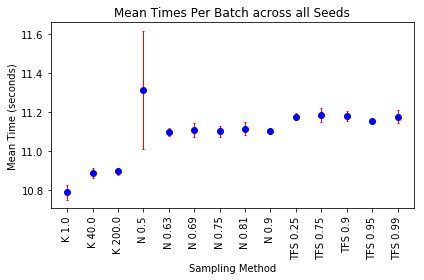

In [25]:
  
plt.figure()
x_pos = np.arange(flat_vals.shape[0])
plt.errorbar(x_pos, flat_vals['mean'], flat_vals['err'], ecolor='red', fmt='o', linewidth=1, capsize=1, color = 'blue')
plt.xticks(x_pos, flat_vals['names'])
plt.ylabel('Mean Time (seconds)')
plt.xlabel('Sampling Method')
plt.xticks(rotation=90)
plt.title('Mean Times Per Batch across all Seeds')
plt.tight_layout()
plt.gcf().savefig('ImageOutputs/MeanTimesPerBatch.png',dpi=250)
plt.show()

In [ ]:
# ignoring the first iteration it is 0.0351551861233208 of a second difference in overall means between N and TFS. 

# Grouping each of them

In [49]:
flat_vals.head()

,level_0,level_1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,mean,err,names
0,k,1.00,10.704505,10.816683,10.770511,10.775810,10.759020,10.793967,10.748312,10.834501,10.770661,10.784466,10.797767,10.733205,10.735234,11.045952,10.749693,10.788019,0.038555,K 1.0
1,k,40.00,11.002557,10.862068,10.873883,10.861510,10.847305,10.832083,10.855676,10.860775,10.866235,10.898146,10.844455,10.973103,10.898250,10.876893,10.947484,10.886695,0.024348,K 40.0
2,k,200.00,10.889209,10.864074,10.863217,10.914722,10.913626,10.891197,10.891008,10.891883,10.889962,10.830510,10.922753,10.995511,10.856467,10.918936,10.920092,10.896878,0.018694,K 200.0
3,n,0.50,11.940071,10.998341,13.401607,11.096773,11.062507,11.071078,11.065272,11.312465,11.100046,11.117000,11.086068,11.156838,11.099554,11.072933,11.130249,11.314053,0.303083,N 0.5
4,n,0.63,11.075751,11.019804,11.028584,11.094243,11.067389,11.178954,11.074235,11.137315,11.122994,11.097026,11.100651,11.147941,11.075192,11.138530,11.130570,11.099279,0.021617,N 0.63


In [51]:
flat_vals.iloc[0,2:-3]

0     10.7045
1     10.8167
2     10.7705
3     10.7758
4      10.759
5      10.794
6     10.7483
7     10.8345
8     10.7707
9     10.7845
10    10.7978
11    10.7332
12    10.7352
13     11.046
14    10.7497
Name: 0, dtype: object

In [68]:
flat_vals.drop(3 ,axis=0)

,level_0,level_1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,mean,err,names
0,k,1.00,10.704505,10.816683,10.770511,10.775810,10.759020,10.793967,10.748312,10.834501,10.770661,10.784466,10.797767,10.733205,10.735234,11.045952,10.749693,10.788019,0.038555,K 1.0
1,k,40.00,11.002557,10.862068,10.873883,10.861510,10.847305,10.832083,10.855676,10.860775,10.866235,10.898146,10.844455,10.973103,10.898250,10.876893,10.947484,10.886695,0.024348,K 40.0
2,k,200.00,10.889209,10.864074,10.863217,10.914722,10.913626,10.891197,10.891008,10.891883,10.889962,10.830510,10.922753,10.995511,10.856467,10.918936,10.920092,10.896878,0.018694,K 200.0
4,n,0.63,11.075751,11.019804,11.028584,11.094243,11.067389,11.178954,11.074235,11.137315,11.122994,11.097026,11.100651,11.147941,11.075192,11.138530,11.130570,11.099279,0.021617,N 0.63
5,n,0.69,11.046247,11.044612,11.014978,11.111979,11.073987,11.090009,11.184474,11.105242,11.120692,11.099405,11.077239,11.133752,11.320395,11.112786,11.070635,11.107096,0.035110,N 0.69
6,n,0.75,11.026049,11.050196,11.093240,11.031366,11.112510,11.128991,11.052367,11.075417,11.239983,11.130995,11.091828,11.094360,11.145818,11.093738,11.150373,11.101149,0.026742,N 0.75
7,n,0.81,11.095417,11.062665,11.047441,11.041453,11.126082,11.107568,11.074609,11.144387,11.070591,11.088154,11.335267,11.139316,11.125112,11.171012,11.097948,11.115135,0.034842,N 0.81
8,n,0.90,11.149390,11.076983,11.066321,11.086155,11.064683,11.114319,11.099013,11.148932,11.102039,11.117033,11.102325,11.075615,11.102718,11.103603,11.137419,11.103103,0.013270,N 0.9
9,tfs,0.25,11.159782,11.264415,11.166665,11.099571,11.148021,11.166413,11.185714,11.130695,11.224511,11.186857,11.192272,11.151201,11.207259,11.179289,11.201687,11.177623,0.019376,TFS 0.25
10,tfs,0.75,11.141237,11.143712,11.140311,11.335253,11.148208,11.117094,11.151436,11.165810,11.185879,11.140023,11.198643,11.163377,11.206974,11.187561,11.360491,11.185734,0.034474,TFS 0.75


In [69]:

# dropping N 0.5 as it had a lot of noise! 
g = flat_vals.drop(3 ,axis=0).groupby('level_0').groups #sum() #.apply(lambda x: x.flatten())

samp_flat_vals = dict()
for key, inds in g.items():
    v = flat_vals.iloc[inds,2:-3]
    samp_flat_vals[key] =v.values.flatten()

In [78]:
samp_means = dict()

for k, v in samp_flat_vals.items():
    
    if k=='n':
        key_label = "Nucleus"
    elif k=='tfs':
        key_label='TFS'
    elif k=='k':
        key_label='Top K'
    
    
    samp_means[key_label] = (v.mean(), 1.96*(v.std() /np.sqrt(v.shape[0]) ) ) 

In [79]:
samp_means = pd.DataFrame(samp_means).T

In [80]:
samp_means.reset_index(inplace=True)
samp_means.columns = ['names', 'mean', 'err']

In [83]:
samp_means.iloc[2,1]  - samp_means.iloc[1,1] 

0.06997206052144378

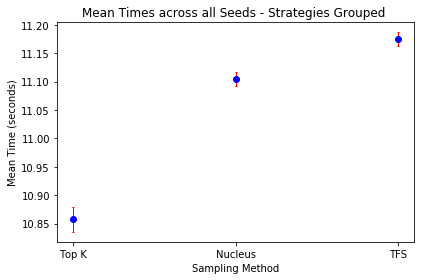

In [81]:
plt.figure()
x_pos = np.arange(samp_means.shape[0])
plt.errorbar(x_pos, samp_means['mean'], samp_means['err'], ecolor='red', fmt='o', linewidth=1, capsize=1, color = 'blue')
plt.xticks(x_pos, samp_means['names'])
plt.ylabel('Mean Time (seconds)')
plt.xlabel('Sampling Method')
#plt.xticks(rotation=90)
plt.title('Mean Times across all Seeds - Strategies Grouped ')
plt.tight_layout()
plt.gcf().savefig('ImageOutputs/MeanTimesPerBatchStratGrouped.png',dpi=250)
plt.show()

## The biggest difference is: 

In [26]:
flat_vals['mean'].max() - flat_vals['mean'].min()

0.526034386952718

In [27]:
(flat_vals['mean'].max() - flat_vals['mean'].min()) / 25 # per sample as 25 to a batch. 

0.02104137547810872

In [28]:
(1000*0.07680212747305631)/60 # extra minutes per 1,000 samples.

# nucleus is just as slow. 

1.2800354578842719

In [33]:
batch_means = times.groupby(['sampling_method', 'param'])[[1,2,3]].mean()

In [34]:
batch_means.head()

1          2          3
sampling_method param                                  
k               1.00    10.749665  10.850784  10.763607
                40.00   10.903228  10.858299  10.898558
                200.00  10.876383  10.902254  10.911996
n               0.50    11.263734  11.106463  11.571964
                0.63    11.083289  11.092738  11.121809

In [35]:
(1.96*(batch_means.std(axis=1) /np.sqrt(3) ))

sampling_method  param 
k                1.00      0.062014
                 40.00     0.027953
                 200.00    0.020827
n                0.50      0.267959
                 0.63      0.022717
                 0.69      0.044534
                 0.75      0.039659
                 0.81      0.051873
                 0.90      0.007604
tfs              0.25      0.009603
                 0.75      0.016631
                 0.90      0.007805
                 0.95      0.007380
                 0.99      0.020154
dtype: float64

In [36]:
means = batch_means.mean(axis=1)
means

sampling_method  param 
k                1.00      10.788019
                 40.00     10.886695
                 200.00    10.896878
n                0.50      11.314053
                 0.63      11.099279
                 0.69      11.107096
                 0.75      11.101149
                 0.81      11.115135
                 0.90      11.103103
tfs              0.25      11.177623
                 0.75      11.185734
                 0.90      11.178982
                 0.95      11.155667
                 0.99      11.177615
dtype: float64

In [37]:
means = means.reset_index()

In [38]:
means['names'] = means['sampling_method'] + '_'+ means['param'].apply(lambda x: str(x))

In [39]:
means.head()

,sampling_method,param,0,names
0,k,1.00,10.788019,k_1.0
1,k,40.00,10.886695,k_40.0
2,k,200.00,10.896878,k_200.0
3,n,0.50,11.314053,n_0.5
4,n,0.63,11.099279,n_0.63


In [46]:
groups = means.groupby('sampling_method').mean()
groups

,param,0
sampling_method,,
k,80.333333,10.857197
n,0.713333,11.139969
tfs,0.768000,11.175124


In [48]:
groups.iloc[2,1] - groups.iloc[1,1]

0.0351551861233208

Bar Plot of the Odds


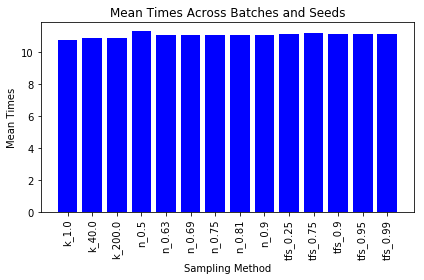

In [40]:
print('Bar Plot of the Odds')
    
plt.figure()
x_pos = np.arange(means.shape[0])
plt.bar(x_pos, means[0], color = 'blue')
plt.xticks(x_pos, means['names'])
plt.ylabel('Mean Times')
plt.xlabel('Sampling Method')
plt.xticks(rotation=90)
plt.title('Mean Times Across Batches and Seeds')
plt.tight_layout()
plt.show()

In [ ]:
# get standard errors for each of these. 